<img src="https://raw.githubusercontent.com/LuisVelasc/Imagenes/main/Cabecera_EjemplosGraficas.PNG?token=AVRFM4CMZBYYAVOBOLJ5Q2TBKR3RK" alt="drawing" width="400">

Notas realizadas en el curso de edX Data Science: Visualization

## Base de datos
Comenzamos cargando las librerías necesarias para el ejemplo:

In [1]:
library(tidyverse)
library(ggrepel)
library(ggthemes)
library(dslabs)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



Utilizaremos una base de datos que contiene registros sobre homicidios con arma de fuego en Estados Unidos.

In [2]:
data(murders)

Revisamos la base de datos, contiene información como población y asesinatos por estado y región.

In [3]:
head(murders)

,state,abb,region,population,total
,<chr>,<chr>,<fct>,<dbl>,<dbl>
1,Alabama,AL,South,4779736,135
2,Alaska,AK,West,710231,19
3,Arizona,AZ,West,6392017,232
4,Arkansas,AR,South,2915918,93
5,California,CA,West,37253956,1257
6,Colorado,CO,West,5029196,65


Definimos el valor rate que es la tasa media de homicidios en todo el país, el valor se usará para graficar una línea 

<img src="https://raw.githubusercontent.com/LuisVelasc/Imagenes/main/EjemplosGraficas_E1.PNG?token=AVRFM4E3GT64NSVVKICWNRLBKR3TI" alt="drawing" width="200">


In [4]:
r <- murders %>%
  summarize(rate = sum(total) / sum(population) * 10^6) %>%
  .$rate

## Elementos de la gráfica
Ahora se crea el gráfica, diferentes elementos se añadirán poco a poco para identificar las funciones de cada capa. En primera instancia se crea una grafican las poblaciones contra el número de asesinatos totales. Los datos se agrupan por región y se agregan etiquetas a cada punto

Warning message:
"ggrepel: 29 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


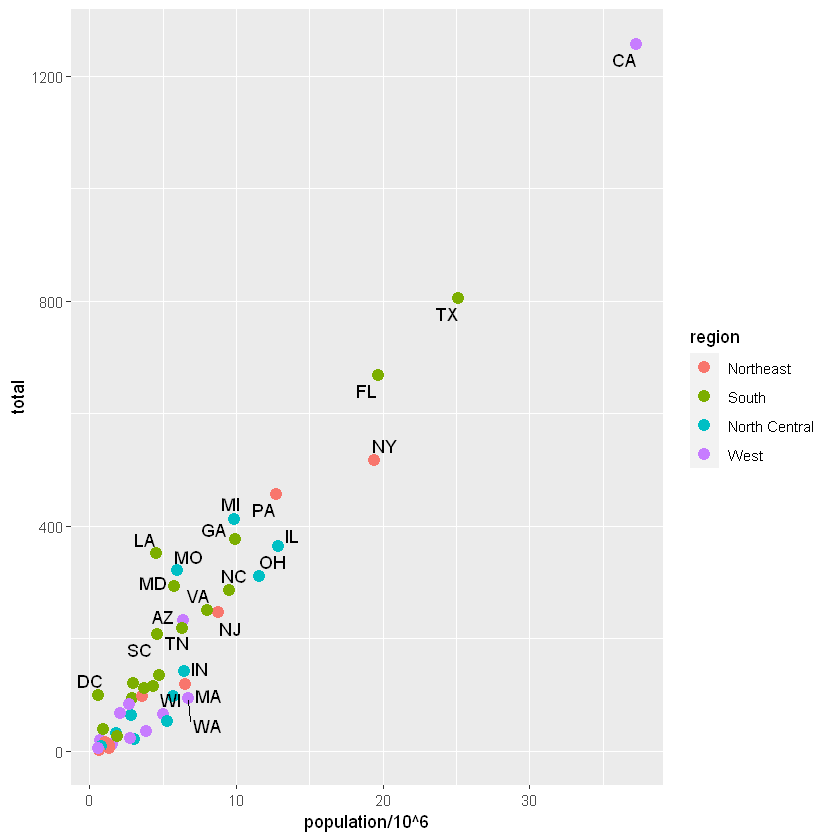

In [5]:
p= murders %>%
  ggplot(aes(population/10^6, total, label = abb)) +
  geom_point(aes(col = region), size = 3) +
  geom_text_repel()
p

En el siguiente código se cambia la escala de ambos ejes a escala logaritmica de base 10. Se agrega una línea que representa el promedio nacional por millón de habitantes. Los estados por encima de dicha línea presentan un número de homicidios por encima de la media nacional y viceversa. 

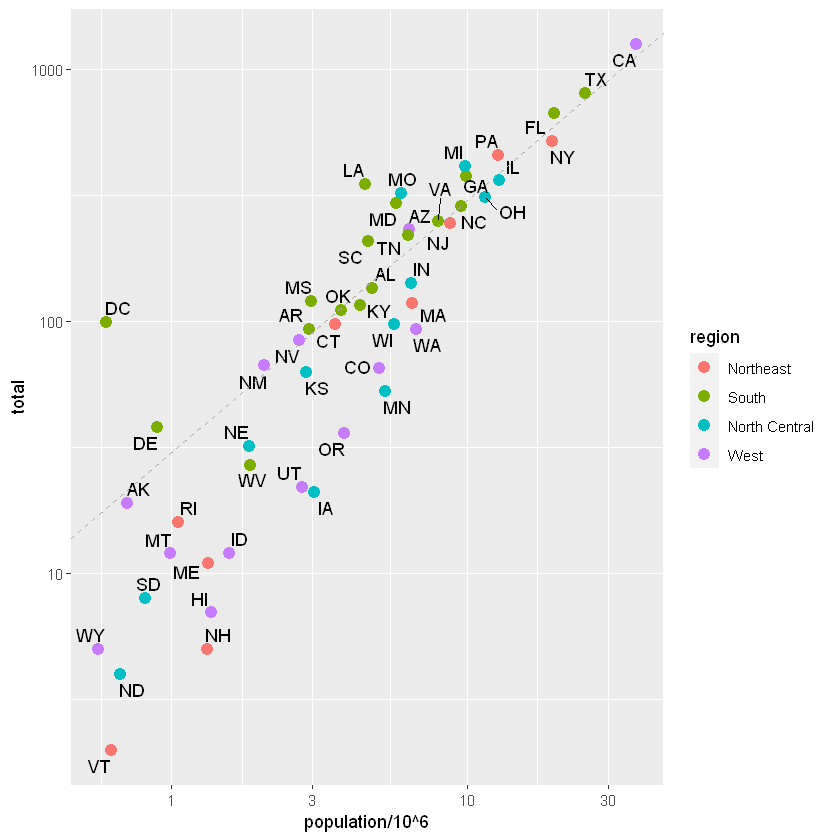

In [6]:
p= p +
  scale_x_log10() +
  scale_y_log10() +
  geom_abline(intercept = log10(r), lty = 2, color = "darkgrey")
p

Se agregan los títulos a los ejes y a la gráfica.

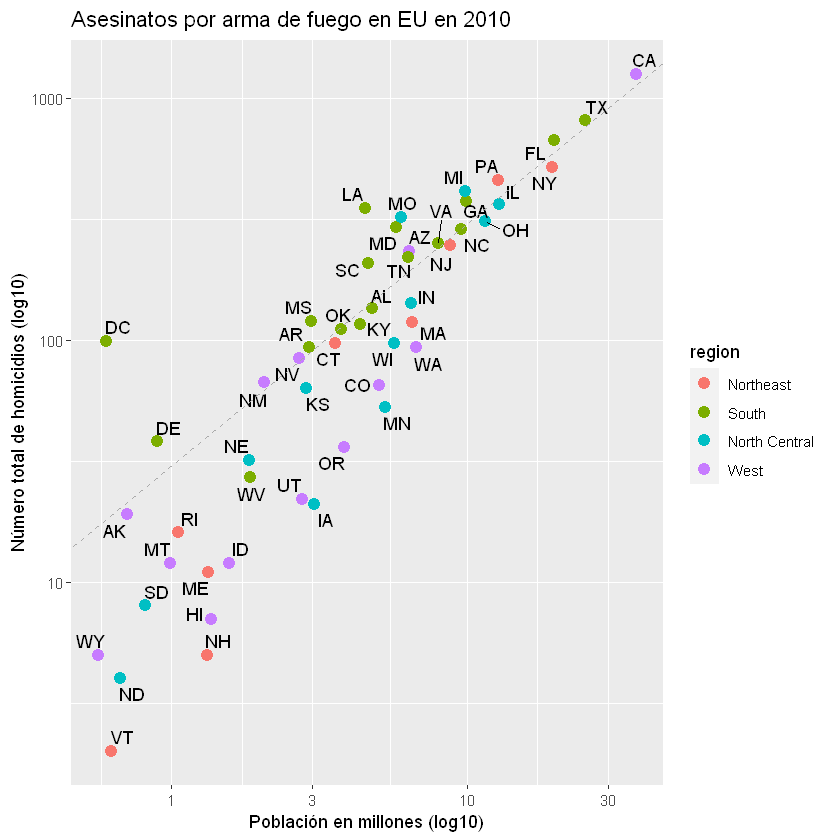

In [7]:
p= p +
  xlab("Población en millones (log10)") +
  ylab("Número total de homicidios (log10)") +
  ggtitle("Asesinatos por arma de fuego en EU en 2010")
p

Se cambia el título de la leyenda para agregar una letra "R" al inicio. Por último se aplica el tema de the economist a la gráfica. 

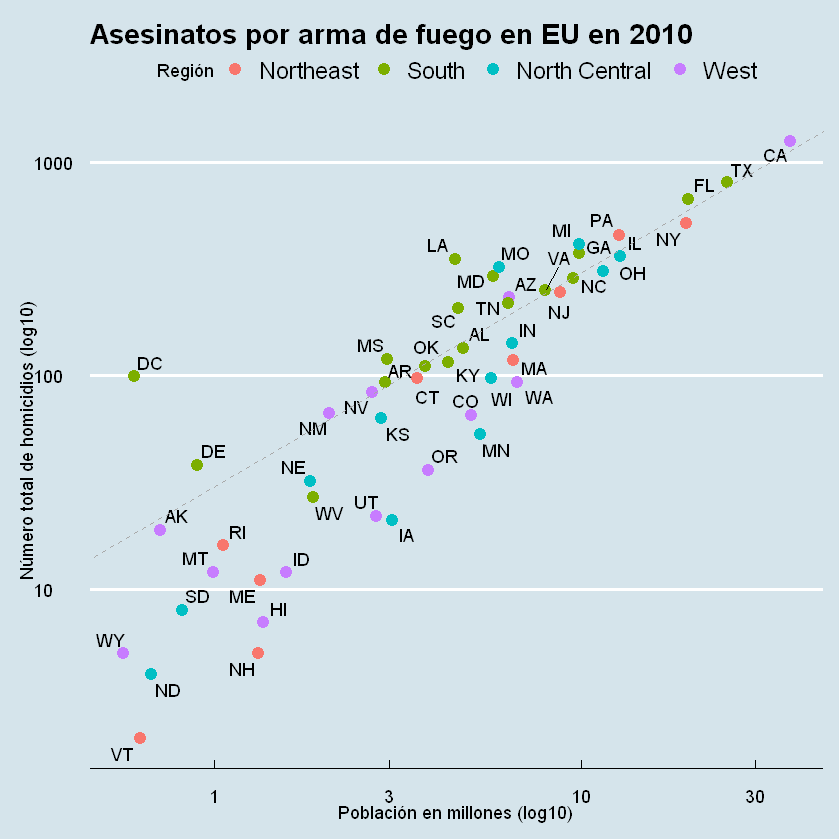

In [8]:
p= p +
  scale_color_discrete(name = "Región") +
  theme_economist()
p

Cógido completo de la gráfica

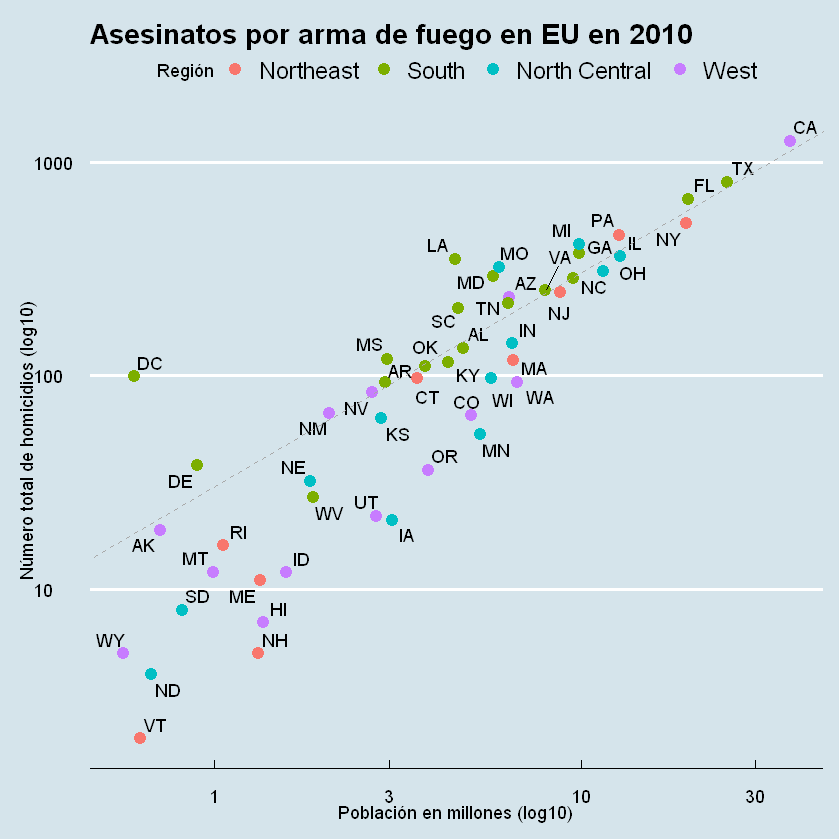

In [9]:
murders %>%
  ggplot(aes(population/10^6, total, label = abb)) +
  geom_point(aes(col = region), size = 3) +
  geom_text_repel() +
  scale_x_log10() +
  scale_y_log10() +
  geom_abline(intercept = log10(r), lty = 2, color = "darkgrey") +
  xlab("Población en millones (log10)") +
  ylab("Número total de homicidios (log10)") +
  ggtitle("Asesinatos por arma de fuego en EU en 2010") +
  scale_color_discrete(name = "Región") +
  theme_economist()

## Otros estilos diferentes al de the economist

Base de las gráficas

In [10]:
p = murders %>%
  ggplot(aes(population/10^6, total, label = abb)) +
  geom_point(aes(col = region), size = 3) +
  geom_text_repel() +
  scale_x_log10() +
  scale_y_log10() +
  geom_abline(intercept = log10(r), lty = 2, color = "darkgrey") +
  xlab("Población en millones (log10)") +
  ylab("Número total de homicidios (log10)") +
  ggtitle("Asesinatos por arma de fuego en EU en 2010") +
  scale_color_discrete(name = "Región")

Tema <b>few<b/>

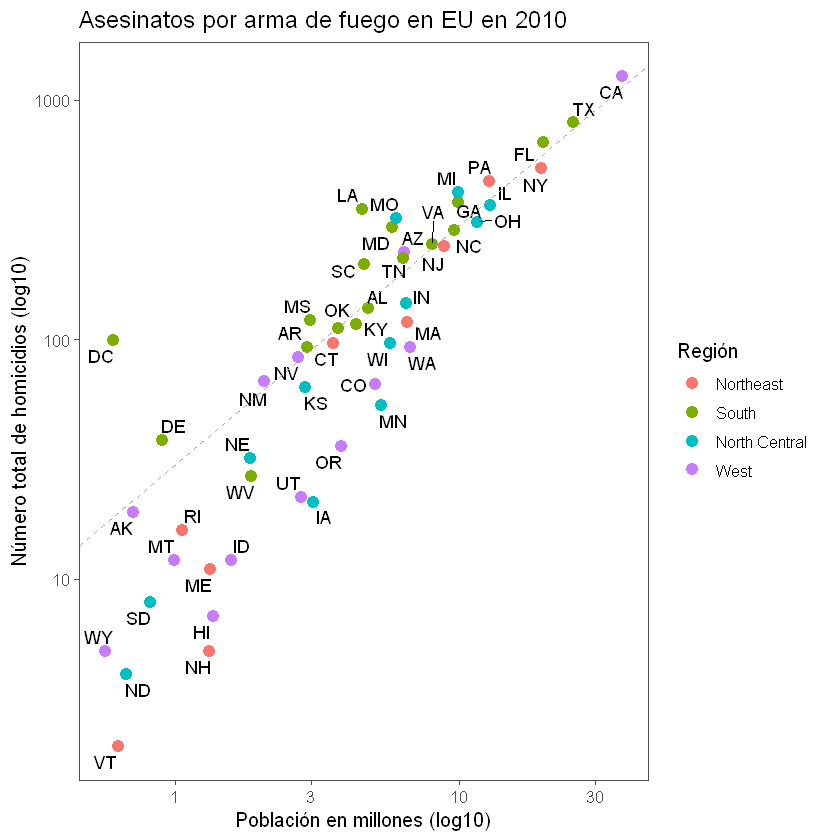

In [11]:
p + theme_few()

Tema <b>calc<b/>

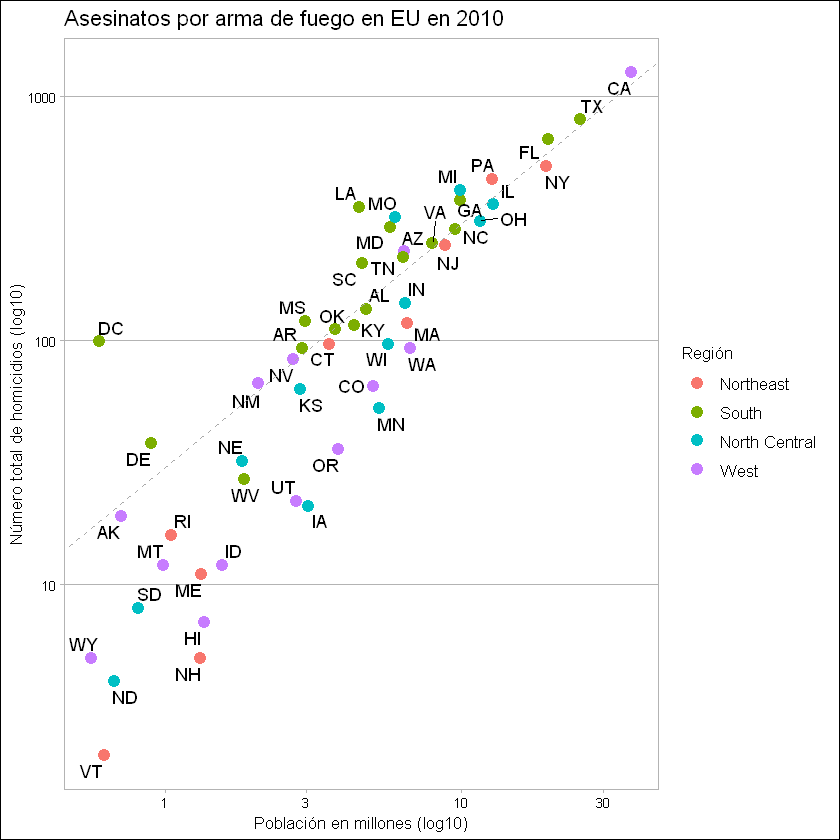

In [12]:
p + theme_calc()

Tema de <b>excel</b>

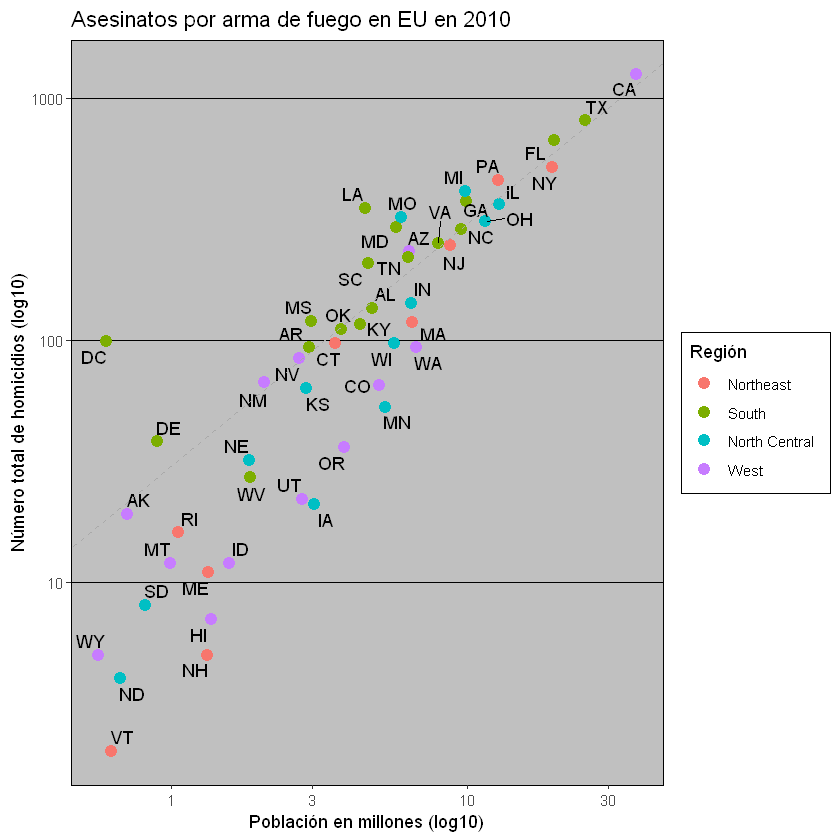

In [13]:
p + theme_excel()

Tema <b>fivethirtyeight</b>

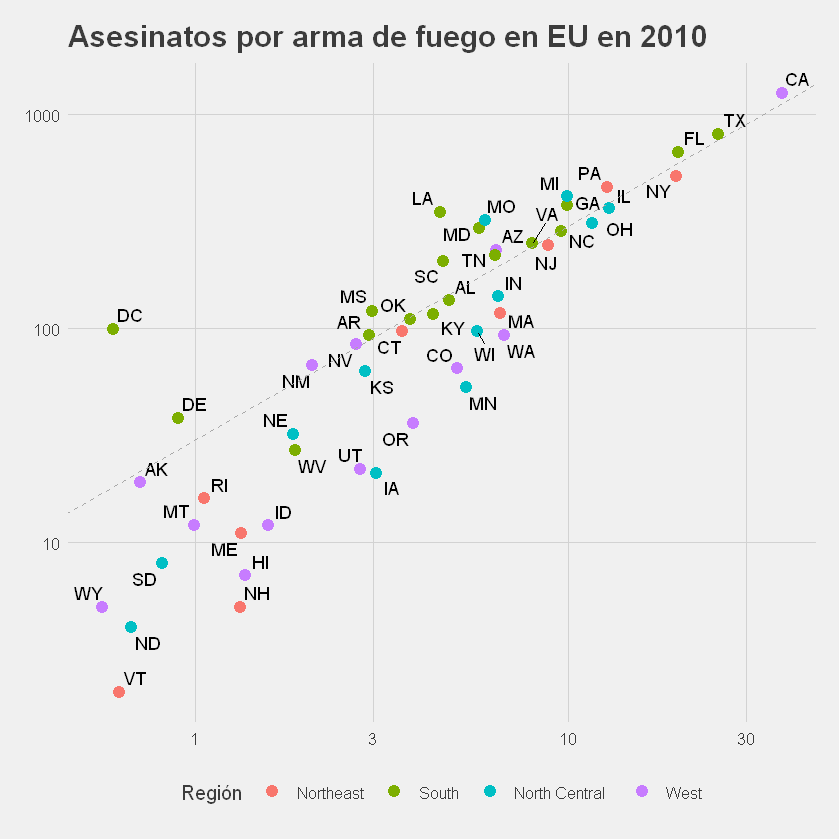

In [14]:
p + theme_fivethirtyeight(base_size = 12, base_family = "sans")

Tema <b>igray</b>

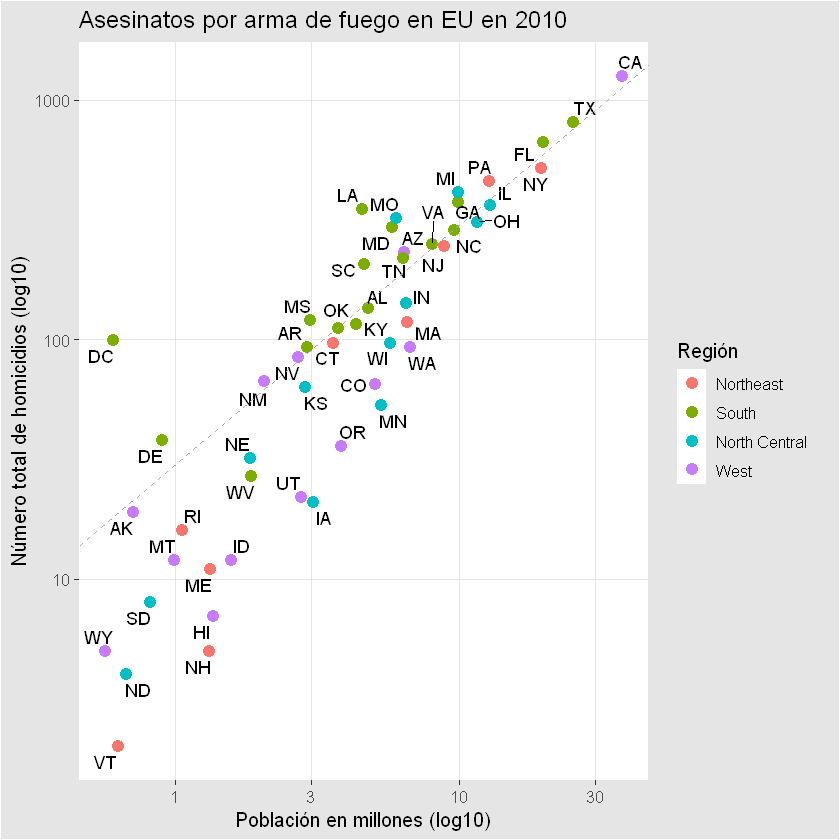

In [15]:
p + theme_igray()

Tema <b>wsj</b>

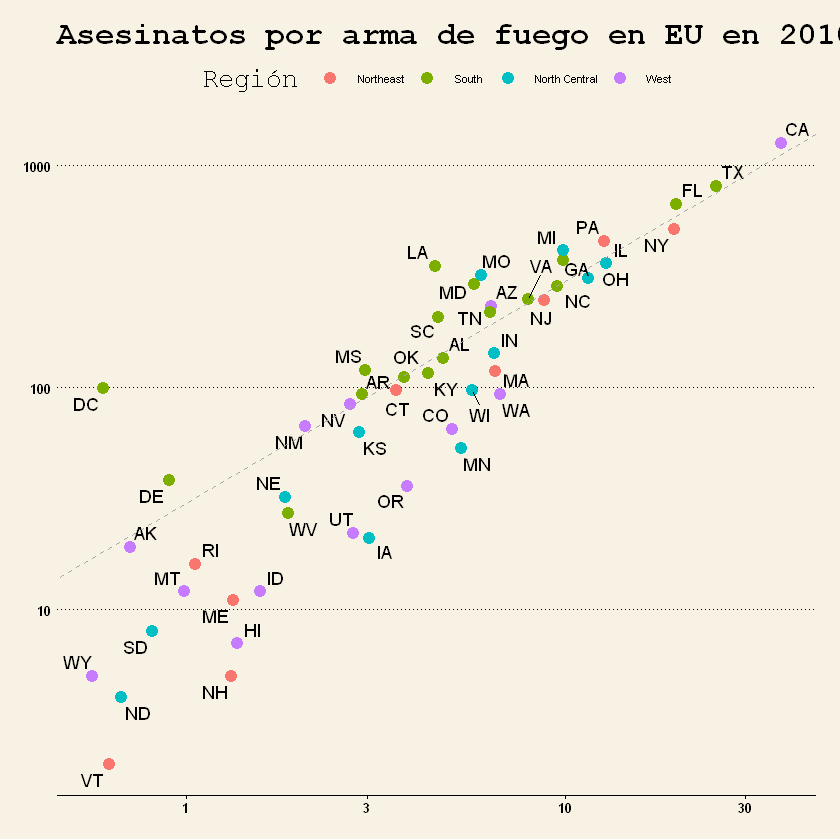

In [16]:
p + theme_wsj(base_size = 8)

Tema <b>solarized 2</b>

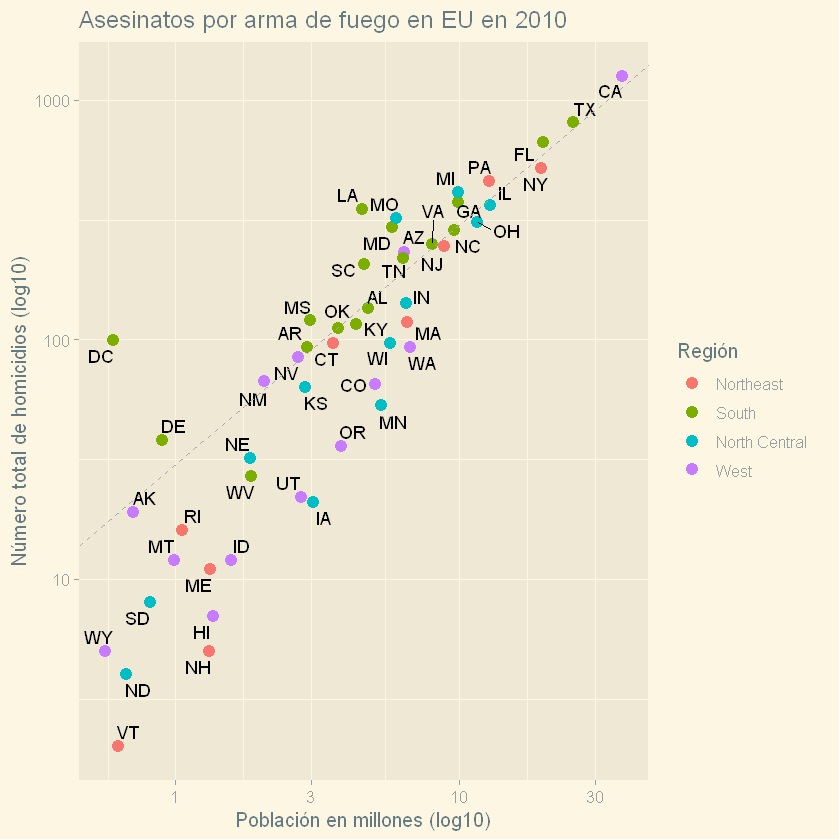

In [17]:
p + theme_solarized_2(base_size = 12, base_family = "", light = TRUE)

Tema <b>pander</b>

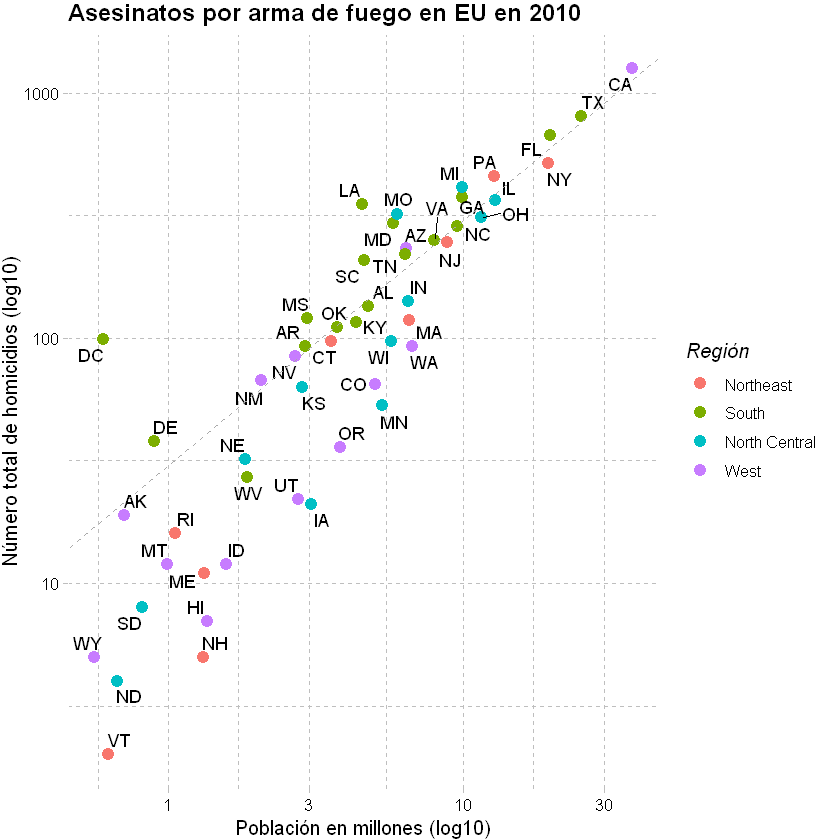

In [18]:
p + theme_pander()